## I. Max Cut edge

Le Max Cut Edge Problem est un problème de théorie des graphes. Étant donné un graphe, nous devons trouver le nombre maximal d'arêtes qui peuvent être coupées de manière à diviser le graphe en deux ensembles de sommets disjoints. Les arêtes coupées doivent être telles que le nombre d'arêtes entre les deux ensembles disjoints soit maximisé.


Ici, nous pouvons examiner quelques cas de base, où nous divisons l'ensemble des nœuds en deux ensembles et comptons le nombre d'arêtes allant d'un ensemble à un autre.

Avec 2 Noeuds :

![Max_Cut_Edge](../fig/02_2_nodes_cuts.png)

Avec 3 Noeuds :

![Max_Cut_Edge](../fig/02_3_nodes_cuts.png)

On peut, par exemple, formuler le cout de notre problème de la manière suivante :

\begin{equation}
    C_{total} = \sum C_{ij} = \sum \frac{1}{2} w_{ij} (1 - z_i z_j)
\end{equation}

Où

\begin{equation}
    z_i = \begin{cases} 1 & \text{si le noeud est dans l'ensemble 1} \\ -1 & \text{si le noeud est dans l'ensemble 2} \end{cases}
\end{equation}

Et $w_{ij}$ le poids de l'arête de noeud i au noeud j tel que : 

\begin{equation}
    w_{ij} = \begin{cases} 1 & \text{si il y a un arête du noeud i au noeud j} \\ 0 & \text{otherwise} \end{cases}
\end{equation}





## II. Fonction de cout et QUBO ( Quadratic Unconstrained Binary Optimization)

### (i) Formulation Explicite

Pour résoudre ce problème, c'est-à-dire trouver la valeur minimale possible de notre fonction de coût et l'état associé du système, nous voulons utiliser l'optimisation quantique.

Pour encoder le problème dans notre ordinateur quantique, nous utilisons des artefacts de physique quantique qui imposent à la fonction de coût d'avoir la forme d'un hamiltonien Ising.

Cela signifie que la fonction de coût doit prendre la forme :

\begin{equation}
    H = \sum_{i} h_i \sigma_i + \sum_{i, j} J_{ij} \sigma_i \sigma_j
\end{equation}

En réalité, le problème du maximum de coupe dans un graphe (max cut) est très proche du modèle Ising, et nous pouvons facilement encoder la fonction de coût dans le modèle Ising.

Nous devons simplement définir la correspondance suivante :

\begin{equation}
    h_i = 0
\end{equation}

et

\begin{equation}
    J_{ij} = - \frac{1}{2} w_{ij}
\end{equation}

Nous devons rappeler que nous utilisons des qubits dans les états 0 ou 1, et nous pouvons facilement encoder l'état du système comme suit :

\begin{equation}
    \sigma_i = 2 x_i - 1
\end{equation}

Où $x_i$ est l'état du qubit i.

### (ii) Formulation QUBO du problème

En fait, un problème d'optimisation quantique tel que le problème de coupe maximale des arêtes (Max Cut Edge Problem) fait partie d'un ensemble plus vaste de problèmes appelé problèmes d'optimisation binaire quadratique sans contrainte (QUBO).

Pour être plus précis, un problème QUBO a une fonction de coût qui peut être écrite comme suit :

$$
f(x) = \sum_{i=1}^{n} a_i x_i + \sum_{i=1}^{n} \sum_{j=i+1}^{n} b_{ij} x_i x_j
$$

Où $x_i$ et $x_j$ sont des variables binaires, et $a_i$ et $b_{ij}$ sont des coefficients réels.

L'avantage de ces fonctions de coût est qu'elles peuvent être écrites sous la forme d'un hamiltonien Ising, prouvant que ces problèmes peuvent être résolus à l'aide de l'optimisation quantique.

#### Demonstration que l'Hamiltoinien Ising est un cas particulier du modèle QUBO

Le problème QUBO est très étroitement lié et équivalent en termes de calcul au *modèle Ising*, dont la *fonction Hamiltonienne* est définie comme suit :
\begin{align}
H(\sigma) &= -\sum_{\langle i~j\rangle} J_{ij} \sigma_i \sigma_j - \mu \sum_j h_j \sigma_j
\end{align}
avec des paramètres réels $h_j, J_{ij}, \mu$ pour tous les indices $i, j$.
Les *variables de spin* $\sigma_j$ sont binaires avec des valeurs issues de $\{-1, +1\}$ au lieu de $\mathbb{B}$.
De plus, dans le modèle Ising, les variables sont généralement disposées en un réseau où seuls les paires de variables voisines $\langle i~j\rangle$ peuvent avoir des coefficients non nuls.
L'application de l'identité $\sigma\mapsto 2x-1$ donne un problème QUBO équivalent : \cite{nom}
\begin{align}
f(x) &= \sum_{\langle i~j\rangle} -J_{ij}(2x_i-1)(2x_j-1) +\sum_{j}\mu h_j(2x_j-1) \\
&= \sum_{\langle i~j\rangle} (-4J_{ij}x_ix_j +2J_{ij}x_i +2J_{ij}x_j -J_{ij}) +\sum_{j}(2\mu h_jx_j-\mu h_j) &&\text{en utilisant } x_j=x_jx_j\\
&= \sum_{\langle i~j\rangle} (-4J_{ij}x_ix_j) + \sum_{\langle i~j\rangle}2J_{ij}x_i + \sum_{\langle i~j\rangle}2J_{ij}x_j +\sum_{j}2\mu h_jx_j -\sum_{\langle i~j\rangle}J_{ij} -\sum_{j}\mu h_j\\
&= \sum_{\langle i~j\rangle} (-4J_{ij}x_ix_j) + \sum_{\langle j~i\rangle}2J_{ji}x_j + \sum_{\langle i~j\rangle}2J_{ij}x_j +\sum_{j}2\mu h_jx_j -\sum_{\langle i~j\rangle}J_{ij} -\sum_{j}\mu h_j &&\text{en utilisant } \sum_{\langle i~j\rangle}=\sum_{\langle j~i\rangle}\\
&= \sum_{\langle i~j\rangle} (-4J_{ij}x_ix_j) + \sum_j\sum_{\langle k=j~i\rangle}2J_{ki}x_j + \sum_j\sum_{\langle i~k=j\rangle}2J_{ik}x_j +\sum_{j}2\mu h_jx_j -\sum_{\langle i~j\rangle}J_{ij} -\sum_{j}\mu h_j\\
&= \sum_{\langle i~j\rangle} (-4J_{ij}x_ix_j) + \sum_j \left(\sum_{\langle i~k=j\rangle}(2J_{ki} + 2J_{ik}) + 2\mu h_j \right)x_j -\sum_{\langle i~j\rangle}J_{ij} -\sum_{j}\mu h_j &&\text{en utilisant } \sum_{\langle k=j~i\rangle}=\sum_{\langle i~k=j\rangle}\\
&= \sum_{i=1}^{n} \sum_{j=1}^i Q_{ij}x_ix_j + C
\end{align}
où
\begin{align}
Q_{ij} &= \begin{cases}-4J_{ij} &\text{si } i\neq j \\
\sum_{\langle i~k=j\rangle}(2J_{ki} + 2J_{ik}) + 2\mu h_j &\text{si } i=j\end{cases} \\
C &= -\sum_{\langle i~j\rangle}J_{ij} -\sum_{j}\mu h_j
\end{align}
et en utilisant le fait que pour une variable binaire $ x_j = x_j x_j $.

Comme la constante $C$ ne change pas la position de l'optimum $x^*$, elle peut être négligée lors de l'optimisation et n'est importante que pour retrouver la valeur de la fonction Hamiltonienne originale.

## III. Encodage et resolution du problème

In [118]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from operator import itemgetter
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
from dwave.cloud import Client

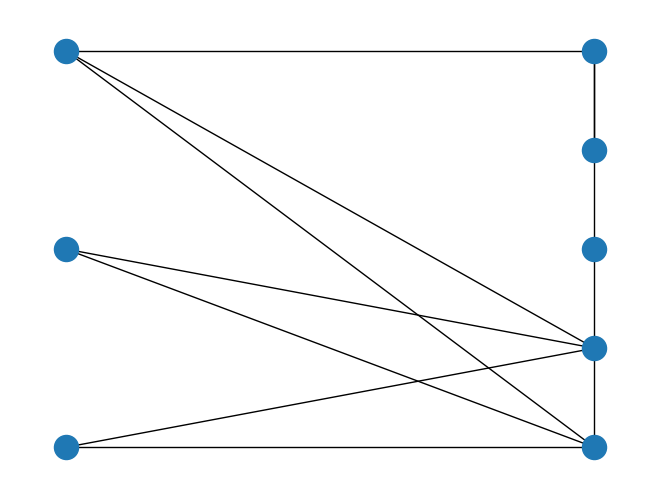

In [119]:
G = nx.Graph()
G.add_edges_from([[0,3],[0,4],[1,3],[1,4],[2,3],[2,4], [3,5], [1,3], [6,7], [2,7], [5,7], [3,5]])
nx.draw(G, pos=nx.bipartite_layout(G, [0,1,2]))

In [126]:
# ------- Set up our QUBO dictionary -------

# Initialize our h vector, J matrix
h = defaultdict(int)
J = defaultdict(int)

# Update J matrix for every edge in the graph
for i, j in G.edges:
    J[(i,j)]+= 1


In [ ]:
# ------- Run our QUBO on the QPU -------


client = Client.from_config(config_file="C:/Users/Martin/Desktop/Github/quantum_annealing/dwave.conf", profile="bqm")

sampler = EmbeddingComposite(DWaveSampler())


# Set up QPU parameters
chainstrength = 2
numruns = 10


In [128]:
# Run the QUBO on the solver from your config file
# sampler = EmbeddingComposite(DWaveSampler())
response = sampler.sample_ising(h, J,
                                chain_strength=chainstrength,
                                num_reads=numruns,
                                label='Example - Maximum Cut Ising')

print(response)

   0  1  2  3  4  5  6  7 energy num_oc. chain_.
0 -1 -1 -1 +1 +1 -1 -1 +1  -10.0       2     0.0
1 +1 +1 +1 -1 -1 +1 +1 -1  -10.0       8     0.0
['SPIN', 2 rows, 10 samples, 8 variables]


In [129]:
# ------- Print results to user -------
print('-' * 60)
print('{:>15s}{:>15s}{:^15s}{:^15s}'.format('Set 0','Set 1','Energy','Cut Size'))
print('-' * 60)
for sample, E in response.data(fields=['sample','energy']):
    S0 = [k for k,v in sample.items() if v == -1]
    S1 = [k for k,v in sample.items() if v == 1]
    print('{:>15s}{:>15s}{:^15s}{:^15s}'.format(str(S0),str(S1),str(E),str(int((6-E)/2))))



------------------------------------------------------------
          Set 0          Set 1    Energy        Cut Size    
------------------------------------------------------------
[0, 1, 2, 5, 6]      [3, 4, 7]     -10.0            8       
      [3, 4, 7][0, 1, 2, 5, 6]     -10.0            8       



Your plot is saved to maxcut_plot_ising.png


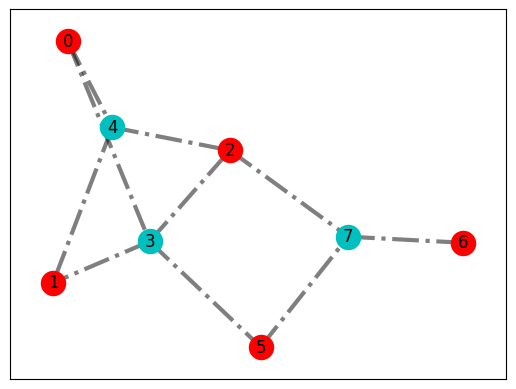

In [134]:
# ------- Display results to user -------
# Grab best result
# Note: "best" result is the result with the lowest energy
# Note2: the look up table (lut) is a dictionary, where the key is the node index
#   and the value is the set label. For example, lut[5] = 1, indicates that
#   node 5 is in set 1 (S1).
lut = response.first.sample

# Interpret best result in terms of nodes and edges
S0 = [node for node in G.nodes if lut[node]==-1]
S1 = [node for node in G.nodes if lut[node]==1]
cut_edges = [(u, v) for u, v in G.edges if lut[u]!=lut[v]]
uncut_edges = [(u, v) for u, v in G.edges if lut[u]==lut[v]]

# Display best result
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=S0, node_color='r')
nx.draw_networkx_nodes(G, pos, nodelist=S1, node_color='c')
nx.draw_networkx_edges(G, pos, edgelist=cut_edges, style='dashdot', alpha=0.5, width=3)
nx.draw_networkx_edges(G, pos, edgelist=uncut_edges, style='solid', width=3)
nx.draw_networkx_labels(G, pos)

filename = "maxcut_plot_ising.png"
plt.savefig(filename, bbox_inches='tight')
print("\nYour plot is saved to {}".format(filename))